In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from tensorflow.keras.utils import to_categorical 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, test_lables) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
image_type = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

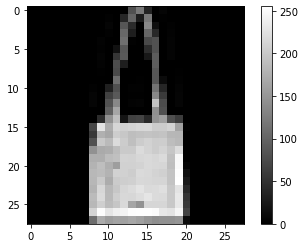

In [4]:
''' Plotting a sample picture '''
plt.figure()
plt.imshow(train_images[200], cmap= 'gray')
plt.colorbar()
plt.show()

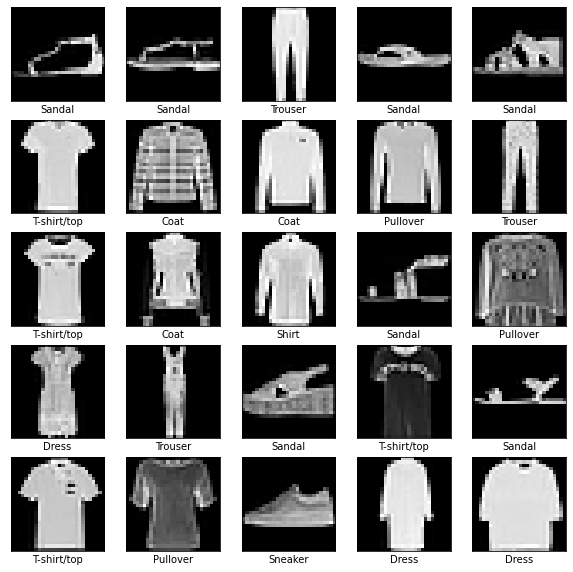

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
  idx = np.random.randint(0,60000, dtype = int)
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[idx], cmap = 'gray')
  plt.xlabel(image_type[train_lables[idx]])

plt.show()


In [6]:
print("train_images")
print(train_images.shape)
train_images  = train_images.reshape(train_images.shape[0], 784)
test_images = test_images.reshape(test_images.shape[0], 784)
print(train_images.shape[0])
print(train_images.shape[1])
print("train_lables")
print(train_lables.shape)



''' Normalizing the data '''
train_images = train_images / 255
test_images = test_images / 255
train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)


train_images
(60000, 28, 28)
60000
784
train_lables
(60000,)


In [7]:
display_step = 1

learning_rate = 0.001
training_epoch = 100
cost_history = np.empty(shape = [1], dtype = float)
n_dim = train_images.shape[1]
n_class  = 10

n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256

n_input = 784

batch_size  = 500

x = tf.placeholder(tf.float32, [None, n_input])
# W = tf.Variable(tf.zeros([n_dim, n_class]))
# b = tf.Variable(tf.zeros([n_class]))
y = tf.placeholder(tf.float32, [None, n_class])

print(x)
print(y)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [8]:
weights = {
    "h1"  : tf.Variable(tf.random_normal([n_input, n_hidden_1])), #784 , 256
    "h2"  : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), #256 , 256
    "h3"  : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])), #256 , 256
    "h4"  : tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])), #256 , 256
    "out"  : tf.Variable(tf.random_normal([n_hidden_2, n_class])), #256 , 10

}

biases = {
    "b1"  : tf.Variable(tf.random_normal([n_hidden_1])),
    "b2"  : tf.Variable(tf.random_normal([n_hidden_2])),
    "b3"  : tf.Variable(tf.random_normal([n_hidden_3])),
    "b4"  : tf.Variable(tf.random_normal([n_hidden_4])),
    "out" : tf.Variable(tf.random_normal([n_class]))
}

def MLP(x, weights, biases):
  # input layer
  layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
  layer_1 =tf.nn.sigmoid(layer_1)
  # First hidden layer
  layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
  layer_2 = tf.nn.sigmoid(layer_2)
  #Second hidden Layer
  layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])  
  layer_3 = tf.nn.sigmoid(layer_3)
  # Third hidden Layer
  layer_4 = tf.add(tf.matmul(layer_3, weights["h4"]), biases["b4"])
  layer_4 = tf.nn.sigmoid(layer_4)
  # Output Layer
  out_layer = tf.matmul(layer_4, weights["out"]) + biases["out"]
  return out_layer


pred = MLP(x, weights, biases)

# Loss function and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= pred , labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.global_variables_initializer()

cost_history  = []
accuracy_history  = []

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch: 0001 - cost= 0.868805625 - Accuracy= 0.6575
Epoch: 0002 - cost= 0.213008063 - Accuracy= 0.7191
Epoch: 0003 - cost= 0.172829522 - Accuracy= 0.7478
Epoch: 0004 - cost= 0.151812314 - Accuracy= 0.7644
Epoch: 0005 - cost= 0.137984700 - Accuracy= 0.7765
Epoch: 0006 - cost= 0.127573230 - Accuracy= 0.7835
Epoch: 0007 - cost= 0.119343474 - Accuracy= 0.7899
Epoch: 0008 - cost= 0.112521329 - Accuracy= 0.7939
Epoch: 0009 - cost= 0.106693498 - Accuracy= 0.7981
Epoch: 0010 - cost= 0.101532109 - Accuracy= 0.8029
Epoch: 0011 - cost= 0.096933855 - Accuracy= 0.8049
Epoch: 0012 - cost= 0.092782219 - Accuracy= 0.8083
Epoch: 0013 - cost= 0.088988985 - Accuracy= 0.8108
Epoch: 0014 - cost= 0.085497362 - Accuracy= 0.8134
Epoch: 0015 - cost= 0.082261486 - Accuracy= 0.8159
Epoch: 0016 - cost= 0.079253022 - Accuracy= 0.8162
Epoch: 0017 - cost= 0.076453734 - Accuracy= 0.8173
Epoch: 0018 - cost= 0.073829636 - Accuracy= 0.8177
Epoch: 0019 - cost= 0.071358513 - Accuracy= 0.8185
Epoch: 0020 - cost= 0.069000520

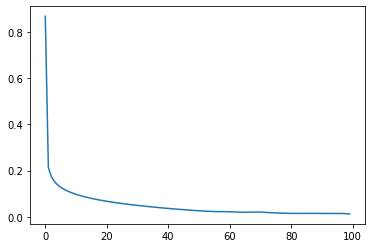

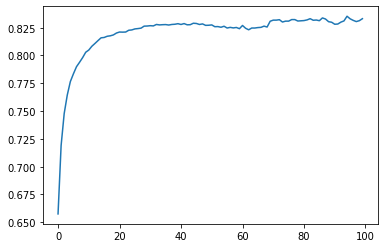

Accuracy: 0.8331


In [9]:
total_batch = int(train_images.shape[0]/batch_size)
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(training_epoch):
    avg_cost = 0
    temp = 0
    for i in range(total_batch):
          batch_x  = train_images[temp:temp+batch_size]
          batch_y  = train_lables[temp:temp+batch_size]
          _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,y: batch_y})
          temp = temp+batch_size
          # Compute average loss
          avg_cost += c
    avg_cost = avg_cost/batch_size
    if epoch % display_step == 0:
      correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      acu_temp = accuracy.eval({x: test_images, y: test_lables})
      accuracy_history.append(acu_temp)
      cost_history.append(avg_cost)
      print("Epoch:", '%04d' % (epoch + 1), "- cost=", "{:.9f}".format(avg_cost), "- Accuracy=",acu_temp)
  print("Optimization Finished!")
  #plot the cost history
  plt.plot(cost_history)
  plt.show()
  #plot the accuracy history
  plt.plot(accuracy_history)
  plt.show()
  # Test model
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  print("Accuracy:", accuracy.eval({x: test_images, y: test_lables}))


    